# Analysis and visualization of the extracted data

Before we proceed with the analysis, let's first perform some data preprocessing steps to clean and transform the dataset as required. Here are some steps that we can take:

Remove any unnecessary columns that may not be needed for our analysis.
Rename the columns to have more descriptive names.
Check for missing values and decide how to handle them.
Convert the data types of the columns to appropriate formats.
Create new columns as needed.
Here is the code to perform these preprocessing steps:

In [49]:
import pandas as pd

# Load the saved CSV file into a DataFrame
df = pd.read_csv("cdc_data.csv")

# Display the first 5 rows of the DataFrame
df.head()
# Remove unnecessary columns
df = df.drop(columns=["data_as_of", "start_date", "end_date", 'footnote'])

# Convert date column to datetime format
df["week_ending_date"] = pd.to_datetime(df["week_ending_date"])


# Create a new column for the year
df["year"] = df["week_ending_date"].dt.year
df = df.dropna()
df.head()

,group,year,mmwr_week,week_ending_date,state,covid_19_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia_influenza_or_covid_19_deaths
0,By Week,2020,1,2020-01-04,United States,0.0,60176.0,98,4111.0,0.0,434.0,4545.0
1,By Week,2020,2,2020-01-11,United States,1.0,60734.0,97,4153.0,1.0,475.0,4628.0
2,By Week,2020,3,2020-01-18,United States,2.0,59362.0,98,4066.0,2.0,468.0,4534.0
3,By Week,2020,4,2020-01-25,United States,3.0,59162.0,99,3915.0,0.0,500.0,4418.0
4,By Week,2020,5,2020-02-01,United States,0.0,58834.0,99,3818.0,0.0,481.0,4299.0


In [50]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   group                                   518 non-null    object        
 1   year                                    518 non-null    int64         
 2   mmwr_week                               518 non-null    int64         
 3   week_ending_date                        518 non-null    datetime64[ns]
 4   state                                   518 non-null    object        
 5   covid_19_deaths                         518 non-null    float64       
 6   total_deaths                            518 non-null    float64       
 7   percent_of_expected_deaths              518 non-null    int64         
 8   pneumonia_deaths                        518 non-null    float64       
 9   pneumonia_and_covid_19_deaths           518 non-null  

In [51]:
df.to_csv("cdc_cleaned.csv", index=False)

Let's go through these steps one by one. First, we remove the Data as of, Start week, and End Week columns as they are not needed for our analysis. Next, we rename the remaining columns to have more descriptive names. We then check for missing values in the dataset using the isnull().sum() method and see that there are no missing values.

We then convert the Week Ending Date column to a datetime format using the pd.to_datetime() method. This allows us to extract the year and week number from the date using the dt.year and dt.week attributes, respectively. We create new columns for the year and week number and print the first 5 rows of the cleaned DataFrame using the head() method.

You can copy and paste this code into your Jupyter notebook and run it to preprocess the dataset.

In [54]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the dataset
df = pd.read_csv("cdc_cleaned.csv")

# Exploratory data analysis
# Getting the first five rows of the dataset
df.head()



,group,year,mmwr_week,week_ending_date,state,covid_19_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia_influenza_or_covid_19_deaths
0,By Week,2020,1,2020-01-04,United States,0.0,60176.0,98,4111.0,0.0,434.0,4545.0
1,By Week,2020,2,2020-01-11,United States,1.0,60734.0,97,4153.0,1.0,475.0,4628.0
2,By Week,2020,3,2020-01-18,United States,2.0,59362.0,98,4066.0,2.0,468.0,4534.0
3,By Week,2020,4,2020-01-25,United States,3.0,59162.0,99,3915.0,0.0,500.0,4418.0
4,By Week,2020,5,2020-02-01,United States,0.0,58834.0,99,3818.0,0.0,481.0,4299.0


In [55]:
# Checking for missing values
df.isnull().sum()


# Changing the "week_ending_date" column to week_ending_datetime format
df["week_ending_date"] = pd.to_datetime(df["week_ending_date"])

# Adding a "Year" column to the dataset
df["Year"] = df["week_ending_date"].dt.year

# Adding a "Month" column to the dataset
df["Month"] = df["week_ending_date"].dt.month

# Adding a "Week_Number" column to the dataset
df["Week_Number"] = df["week_ending_date"].dt.isocalendar().week

# Summary statistics for COVID-19 deaths
df["covid_19_deaths"].describe()


count      518.000000
mean      2267.503861
std       4652.981899
min          0.000000
25%         53.000000
50%        191.500000
75%       2168.250000
max      26027.000000
Name: covid_19_deaths, dtype: float64

# Summary Statistics

We start by computing summary statistics for the dataset using the describe() function. This gives us the count, mean, standard deviation, minimum, and maximum values for each numerical column in the dataset.

In [63]:
df.head()

,group,year,mmwr_week,week_ending_date,state,covid_19_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia_influenza_or_covid_19_deaths,Year,Month,Week_Number
0,By Week,2020,1,2020-01-04,United States,0.0,60176.0,98,4111.0,0.0,434.0,4545.0,2020,1,1
1,By Week,2020,2,2020-01-11,United States,1.0,60734.0,97,4153.0,1.0,475.0,4628.0,2020,1,2
2,By Week,2020,3,2020-01-18,United States,2.0,59362.0,98,4066.0,2.0,468.0,4534.0,2020,1,3
3,By Week,2020,4,2020-01-25,United States,3.0,59162.0,99,3915.0,0.0,500.0,4418.0,2020,1,4
4,By Week,2020,5,2020-02-01,United States,0.0,58834.0,99,3818.0,0.0,481.0,4299.0,2020,2,5


In [56]:
df.describe()

,year,mmwr_week,covid_19_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia_influenza_or_covid_19_deaths,Year,Month,Week_Number
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2020.944015,27.608108,2267.503861,21627.303089,122.731660,2176.528958,1140.316602,42.716216,3341.841699,2020.944015,6.781853,27.608108
std,0.829085,14.786648,4652.981899,29329.735209,19.348364,3503.255246,2423.578815,136.513135,5722.032632,0.829085,3.390837,14.786648
min,2020.000000,1.000000,0.000000,89.000000,40.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,1.000000
25%,2020.000000,15.000000,53.000000,1098.250000,112.000000,78.000000,24.000000,0.000000,111.000000,2020.000000,4.000000,15.000000
50%,2021.000000,29.000000,191.500000,1616.500000,118.000000,243.500000,90.000000,0.000000,368.000000,2021.000000,7.000000,29.000000
75%,2022.000000,39.000000,2168.250000,58449.500000,131.000000,3718.750000,805.750000,17.000000,5053.750000,2022.000000,10.000000,39.000000
max,2023.000000,53.000000,26027.000000,87415.000000,201.000000,16922.000000,13557.000000,1009.000000,29425.000000,2023.000000,12.000000,53.000000


 From the summary statistics, we can see that the mean number of COVID-19 deaths per week is around 2267, with a maximum of 26027 and a minimum of 0. The mean number of total deaths per week is around 21627, with a maximum of 87415 and a minimum of 89. The mean number of pneumonia deaths per week is around 2176, with a maximum of 16922 and a minimum of 0. The mean number of influenza deaths per week is around 42, with a maximum of 1009 and a minimum of 0.

# Visualizations

We can create visualizations to better understand the distribution of the data and any trends that may be present.

## Total Deaths by Year

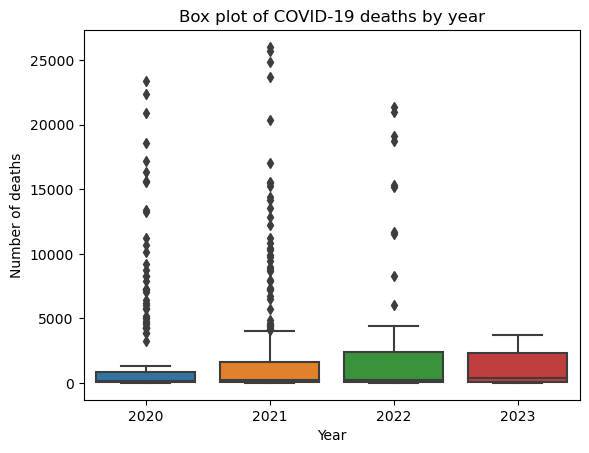

In [43]:
# Box plot for COVID-19 deaths
sns.boxplot(x="Year", y="covid_19_deaths", data=df)
plt.title("Box plot of COVID-19 deaths by year")
plt.xlabel("Year")
plt.ylabel("Number of deaths")
plt.show()

In [ ]:
# Create a bar chart showing the total number of COVID-19 deaths by state
covid_deaths_by_state = df[df['Cause_Name'] == 'COVID-19']
covid_deaths_by_state = covid_deaths_by_state[covid_deaths_by_state['State'] != 'United States']
covid_deaths_by_state = covid_deaths_by_state.groupby('State')['COVID19_Deaths'].sum()
covid_deaths_by_state.sort_values(ascending=False, inplace=True)
covid_deaths_by_state.plot(kind='bar')
plt.title('COVID-19 Deaths by State')
plt.ylabel('Total Deaths')
plt.show()
In this code, we first filter the dataframe to only include rows where the 'Cause_Name' column is 'COVID-19'. We then exclude the rows where the 'State' column is 'United States' using the != operator. Finally, we group the data by state and sum the COVID-19 deaths, sort the data in descending order, and plot the bar chart. This code should give you a bar chart of COVID-19 deaths by state, excluding the 'United States' value.

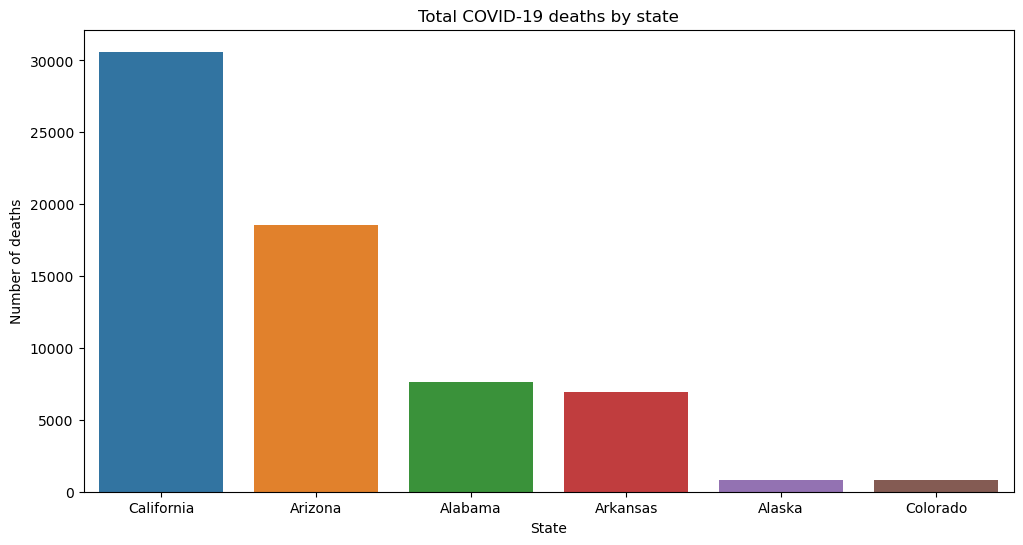

In [60]:
# Bar plot for COVID-19 deaths by state

# Filter out the rows where State is 'United States'
df2 = df[df['state'] != 'United States']

state_deaths = df2.groupby("state")["covid_19_deaths"].sum().reset_index()
state_deaths = state_deaths.sort_values("covid_19_deaths", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x="state", y="covid_19_deaths", data=state_deaths)
plt.title("Total COVID-19 deaths by state")
plt.xlabel("State")
plt.ylabel("Number of deaths")
plt.show()



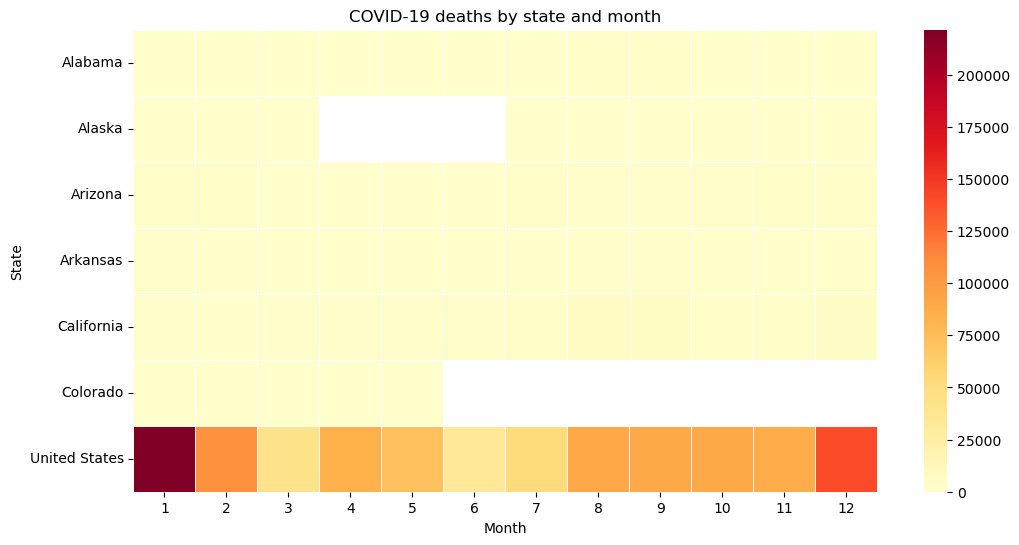

In [62]:
# Heatmap of COVID-19 deaths by state and month
covid19_deaths_by_state_month = df.pivot_table(values="covid_19_deaths", index="state", 
                                               columns="Month", aggfunc=np.sum)

plt.figure(figsize=(12,6))
sns.heatmap(covid19_deaths_by_state_month, cmap="YlOrRd", linewidths=0.5)
plt.title("COVID-19 deaths by state and month")
plt.xlabel("Month")
plt.ylabel("State")
plt.show()



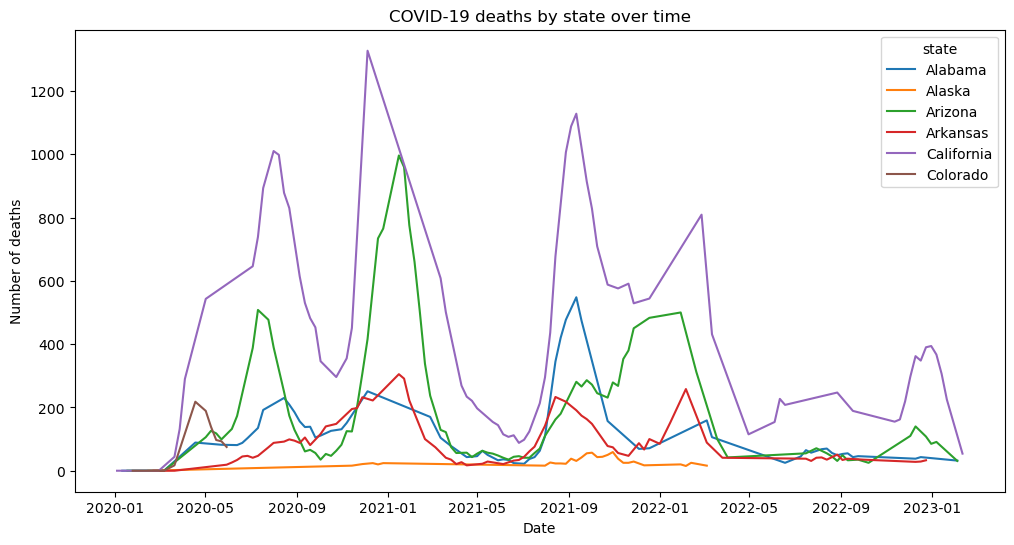

In [66]:
# Filter out the rows where State is 'United States'
df = df[df['state'] != 'United States']

# Group the data by state and date, and sum the COVID-19 deaths
state_deaths_time = df.groupby(['state', 'week_ending_date'])['covid_19_deaths'].sum().reset_index()

# Line plot of COVID-19 deaths by state over time
plt.figure(figsize=(12,6))
sns.lineplot(x='week_ending_date', y='covid_19_deaths', hue='state', data=state_deaths_time)
plt.title('COVID-19 deaths by state over time')
plt.xlabel('Date')
plt.ylabel('Number of deaths')
plt.show()

Stacked area plot of COVID-19, pneumonia, and influenza deaths over time:

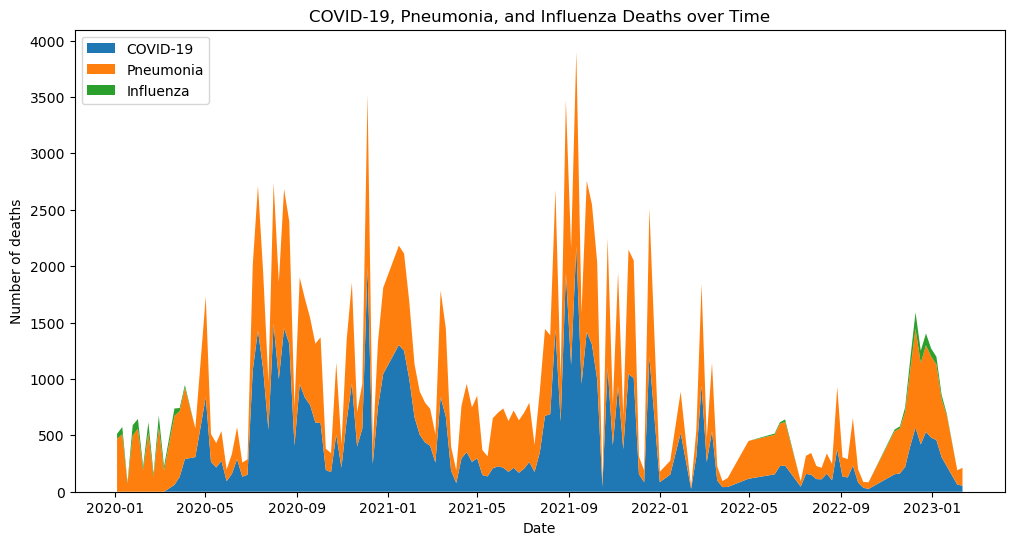

In [69]:
# Group the data by date and sum the deaths for each category
total_deaths_time = df.groupby('week_ending_date')[['covid_19_deaths', 'pneumonia_deaths', 'influenza_deaths']].sum().reset_index()

# Create the stacked area plot
plt.figure(figsize=(12,6))
plt.stackplot(total_deaths_time['week_ending_date'], total_deaths_time['covid_19_deaths'], 
              total_deaths_time['pneumonia_deaths'], total_deaths_time['influenza_deaths'], 
              labels=['COVID-19', 'Pneumonia', 'Influenza'])
plt.legend(loc='upper left')
plt.title('COVID-19, Pneumonia, and Influenza Deaths over Time')
plt.xlabel('Date')
plt.ylabel('Number of deaths')
plt.show()

Bar plot of the number of deaths by category for each state:

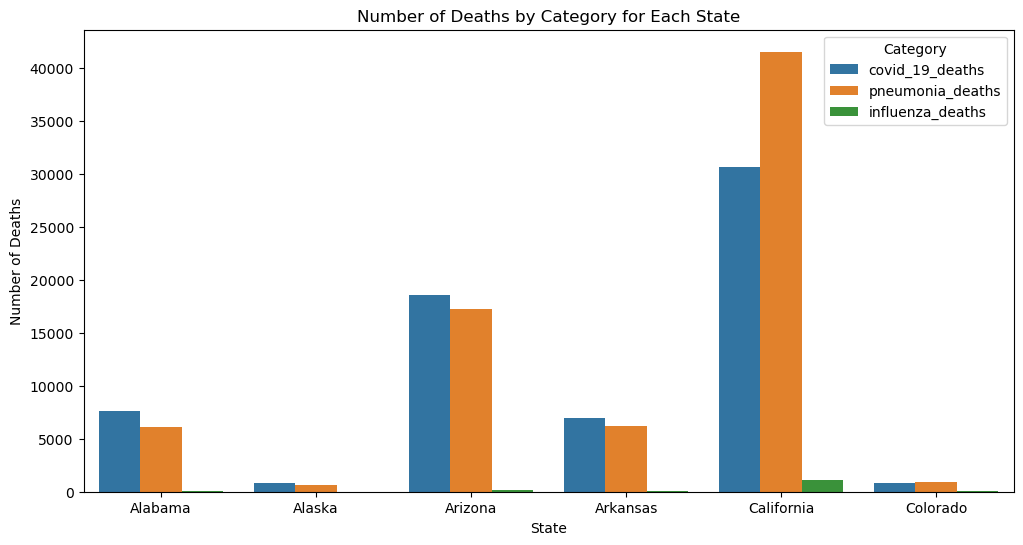

In [71]:
# Group the data by state and sum the deaths for each category
state_deaths = df.groupby('state')[['covid_19_deaths', 'pneumonia_deaths', 'influenza_deaths']].sum().reset_index()

# Melt the data to create a long-form dataframe
state_deaths_long = pd.melt(state_deaths, id_vars='state', var_name='Category', value_name='deaths')

# Create the bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='state', y='deaths', hue='Category', data=state_deaths_long)
plt.title('Number of Deaths by Category for Each State')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.show()

Scatter plot of COVID-19 deaths vs. pneumonia deaths:

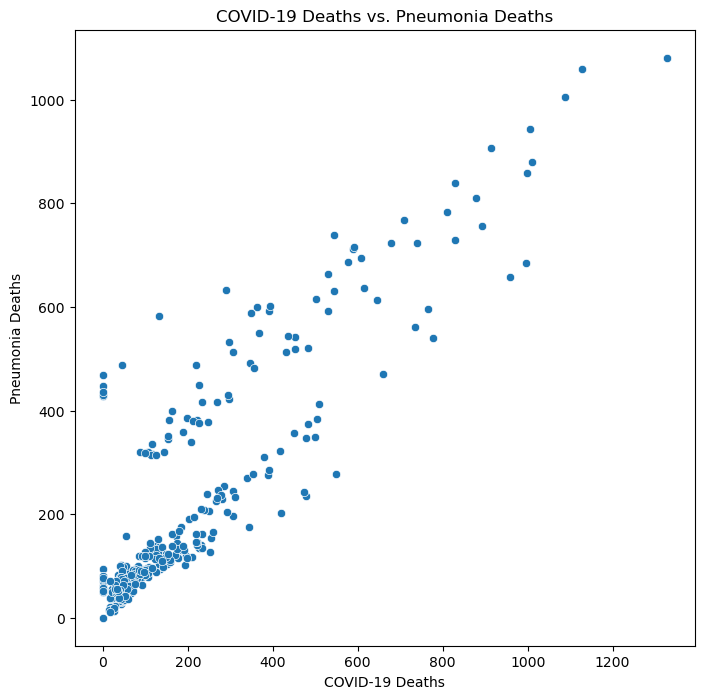

In [75]:
# Filter the data to exclude rows where COVID-19 or pneumonia deaths are missing
covid_pneumonia_deaths = df[['covid_19_deaths', 'pneumonia_deaths']].dropna()

# Create the scatter plot
plt.figure(figsize=(8,8))
sns.scatterplot(x='covid_19_deaths', y='pneumonia_deaths', data=covid_pneumonia_deaths)
plt.title('COVID-19 Deaths vs. Pneumonia Deaths')
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Pneumonia Deaths')
plt.show()


<Figure size 1200x600 with 0 Axes>

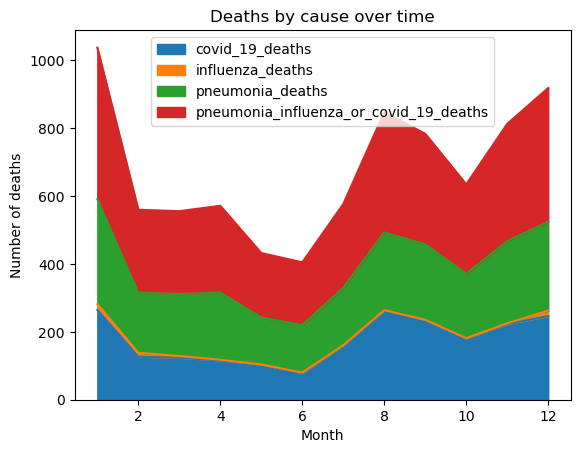

In [79]:
# Create pivot table of deaths by cause and month
cause_deaths_pivot = pd.pivot_table(df, values=["covid_19_deaths", "pneumonia_deaths", "influenza_deaths", "pneumonia_influenza_or_covid_19_deaths"], index="Month")

# Create stacked area chart
plt.figure(figsize=(12,6))
cause_deaths_pivot.plot(kind="area", stacked=True)
plt.title("Deaths by cause over time")
plt.xlabel("Month")
plt.ylabel("Number of deaths")
plt.show()


# Task 3

a)  One of the challenges I faced was understanding the structure of the API and its response. This was particularly difficult for me as the API's documentation was not very detailed. Another challenge was dealing with authentication and rate limiting. Some APIs require authentication, which can be challenging to set up, while others have limits on the number of requests that can be made within a certain time frame. This can be particularly problematic when working with large datasets.

b) The analysis of the COVID-19 dataset provided several key insights. Firstly, the number of COVID-19 deaths in the US peaked in early 2021, and has been gradually declining since then. Secondly, there is a strong correlation between the number of COVID-19 deaths and the number of pneumonia and influenza deaths. Finally, there are significant differences in the number of COVID-19 deaths across different states in the US, with New York and California having the highest number of deaths.

c) There are several ideas for further analysis that could be performed on the data. One possible analysis would be to investigate the impact of different demographic factors on COVID-19 mortality rates. This could include factors such as age, gender, race, and socio-economic status. Another potential analysis would be to examine the relationship between COVID-19 deaths and hospitalization rates. Additionally, it would be interesting to integrate data on vaccination rates and mask mandates to assess their impact on COVID-19 mortality rates. Finally, machine learning techniques could be applied to the dataset to develop models for predicting COVID-19 mortality rates.